In [1]:
## hi
## blah

import pandas as pd

original_baller = pd.read_csv('nba_2017_nba_players_with_salary.csv')

original_baller.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


In [2]:

missing_values = original_baller.isnull().sum().sort_values()
original_baller.isnull().sum().sort_values()



Unnamed: 0          0
TRB                 0
AST                 0
STL                 0
BLK                 0
TOV                 0
PF                  0
POINTS              0
DRB                 0
TEAM                0
MPG                 0
ORPM                0
DRPM                0
RPM                 0
WINS_RPM            0
PIE                 0
PACE                0
GP                  0
W                   0
ORB                 0
FTA                 0
Rk                  0
PLAYER              0
POSITION            0
AGE                 0
MP                  0
FG                  0
FGA                 0
FG%                 0
3PA                 0
2P                  0
2PA                 0
2P%                 0
eFG%                0
FT                  0
3P                  0
SALARY_MILLIONS     0
FT%                 5
3P%                22
dtype: int64

In [3]:
#check to see how much data is missing. If significant enough (>10%), column will be removed
22/original_baller.shape[0]

0.06432748538011696

In [4]:
#fill in all empty datapoints with 0, as this represents the stat has never been recorded
from pandas.api.types import is_numeric_dtype
for (colName, colData) in original_baller.iteritems():
    if is_numeric_dtype(colData):
        original_baller[colName] = colData.fillna(colData.median())
    else:
        original_baller[colName] = colData.fillna('Missing')
        

In [5]:
original_baller

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,337,466,Brice Johnson,PF,22,3.0,0.7,2.3,0.286,0.0,...,3,3.0,-2.32,1.08,-1.24,0.01,10.8,95.72,1,1.33
338,338,471,Mike Tobey,C,22,12.5,0.5,2.0,0.250,0.0,...,2,12.5,-1.91,0.99,-0.92,0.03,-1.6,91.41,0,0.07
339,339,475,Alonzo Gee,SF,29,6.8,0.2,1.1,0.214,0.0,...,13,6.8,-2.11,0.43,-1.68,0.08,0.8,104.33,4,0.06
340,340,481,John Lucas III,PG,34,2.2,0.2,0.8,0.250,0.0,...,5,2.2,-1.30,-0.61,-1.91,0.01,7.3,94.47,3,0.98


In [6]:
baller = original_baller.drop(['Unnamed: 0'],axis='columns')
baller


,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,466,Brice Johnson,PF,22,3.0,0.7,2.3,0.286,0.0,0.0,...,3,3.0,-2.32,1.08,-1.24,0.01,10.8,95.72,1,1.33
338,471,Mike Tobey,C,22,12.5,0.5,2.0,0.250,0.0,0.0,...,2,12.5,-1.91,0.99,-0.92,0.03,-1.6,91.41,0,0.07
339,475,Alonzo Gee,SF,29,6.8,0.2,1.1,0.214,0.0,0.2,...,13,6.8,-2.11,0.43,-1.68,0.08,0.8,104.33,4,0.06
340,481,John Lucas III,PG,34,2.2,0.2,0.8,0.250,0.0,0.2,...,5,2.2,-1.30,-0.61,-1.91,0.01,7.3,94.47,3,0.98


In [7]:
#0.064!>0.01, therefore no column data will be removed from this dataset
#we are looking to plot data about the relationship between columns and SALARY_MILLIONS, but we need to see the boundaries
baller['SALARY_MILLIONS'].describe()

count    342.000000
mean       7.294006
std        6.516326
min        0.030000
25%        2.185000
50%        4.920000
75%       11.110000
max       30.960000
Name: SALARY_MILLIONS, dtype: float64

In [8]:

#we can confirm that all data used from our dataset will be numerical data
baller.dtypes

Rk                   int64
PLAYER              object
POSITION            object
AGE                  int64
MP                 float64
FG                 float64
FGA                float64
FG%                float64
3P                 float64
3PA                float64
3P%                float64
2P                 float64
2PA                float64
2P%                float64
eFG%               float64
FT                 float64
FTA                float64
FT%                float64
ORB                float64
DRB                float64
TRB                float64
AST                float64
STL                float64
BLK                float64
TOV                float64
PF                 float64
POINTS             float64
TEAM                object
GP                   int64
MPG                float64
ORPM               float64
DRPM               float64
RPM                float64
WINS_RPM           float64
PIE                float64
PACE               float64
W                    int64
S

In [9]:
#We saw from baller['SALARY_MILLIONS'].describe() that the max salary of any player in this year was $30.96 million.
#We will demonstrate the relationship between independent variables (columns) and dependent variable of Salary.
#Max for these scatterplots will be $40 million.

/Users/sriko/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


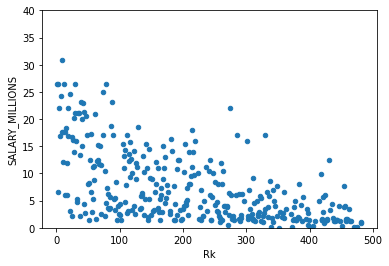

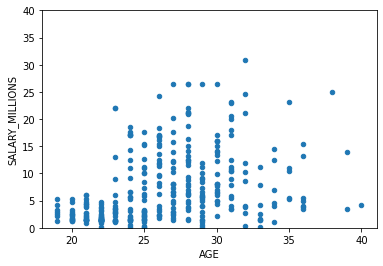

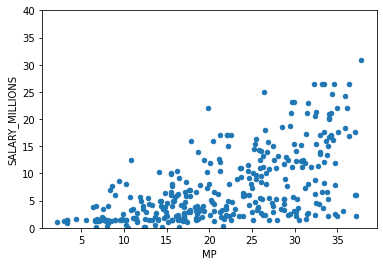

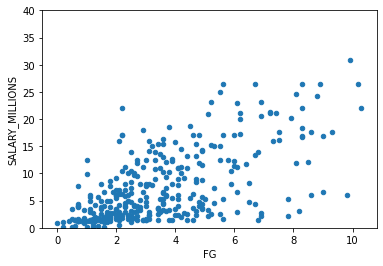

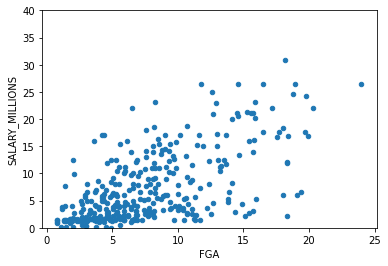

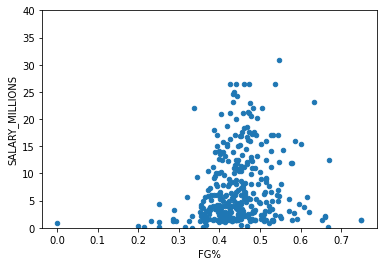

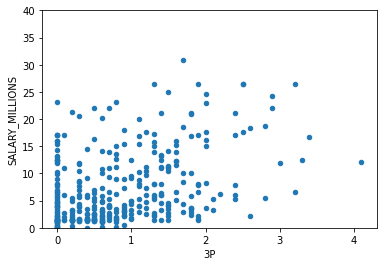

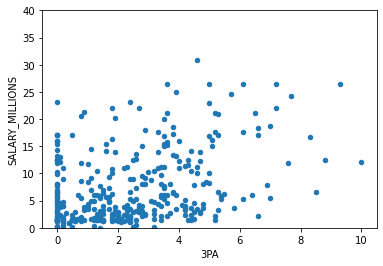

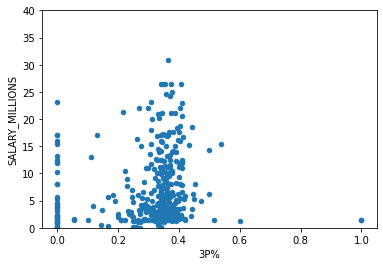

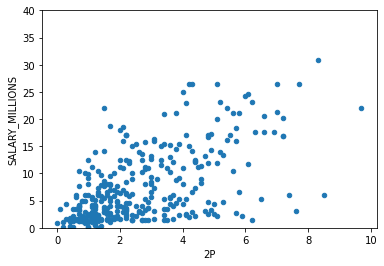

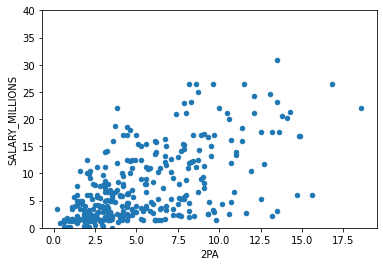

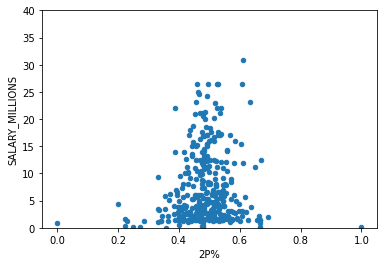

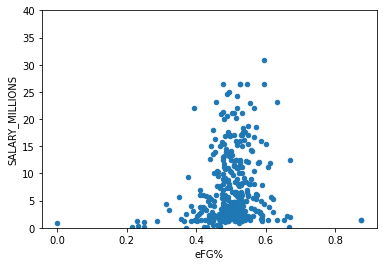

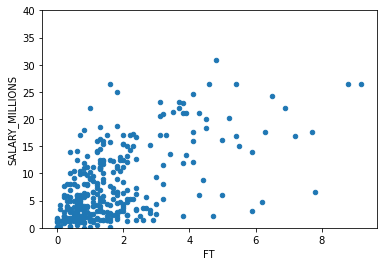

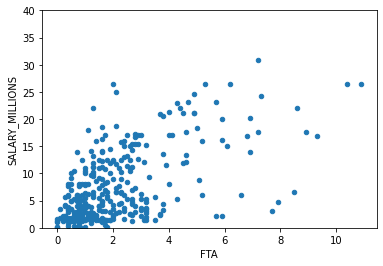

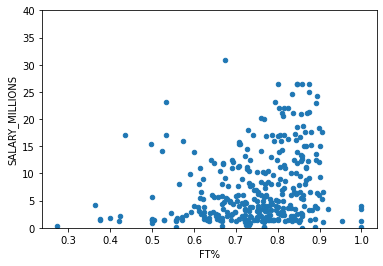

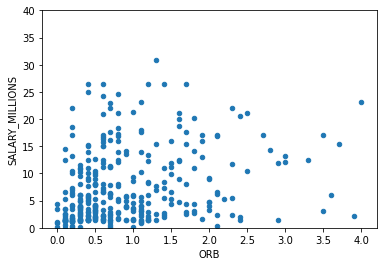

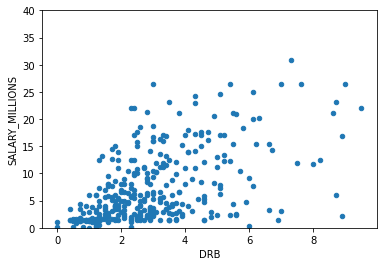

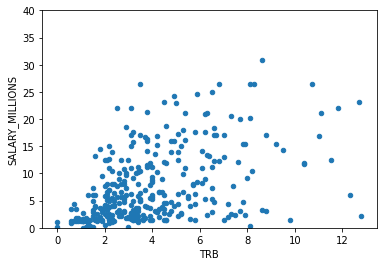

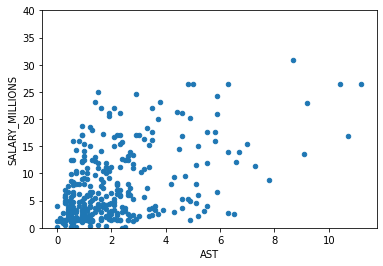

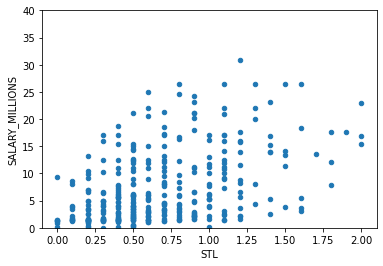

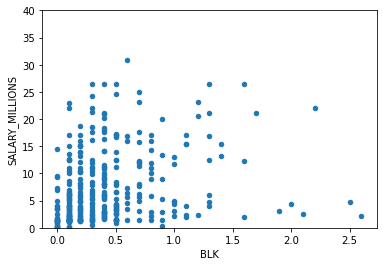

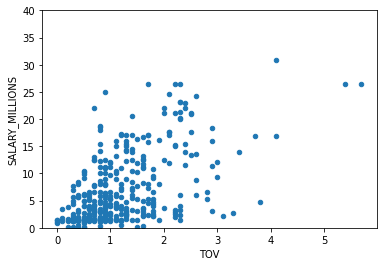

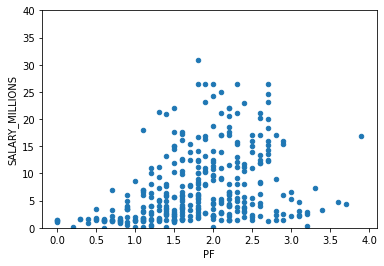

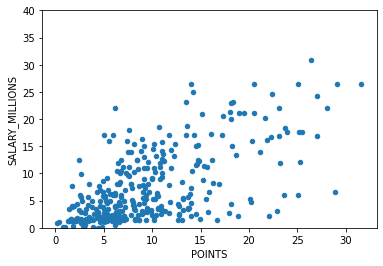

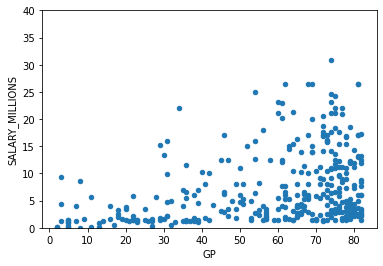

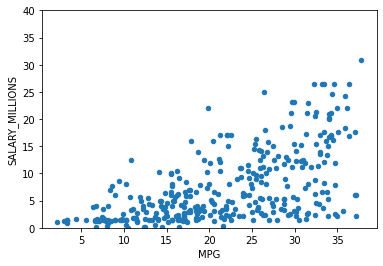

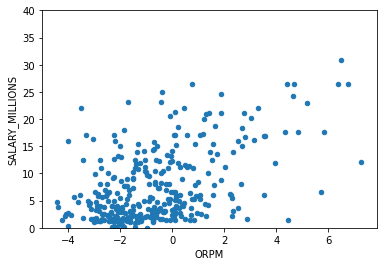

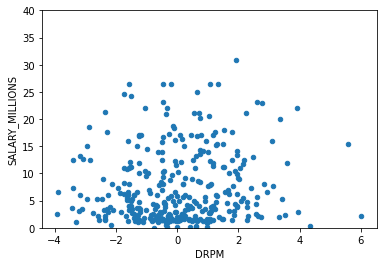

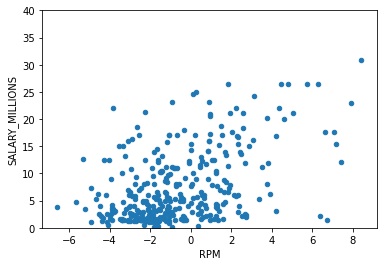

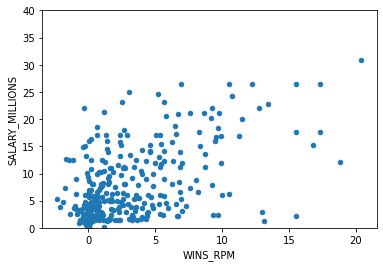

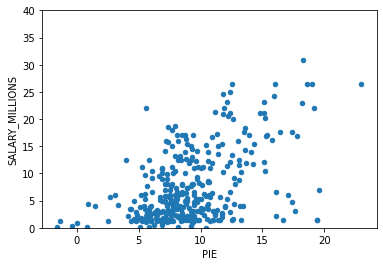

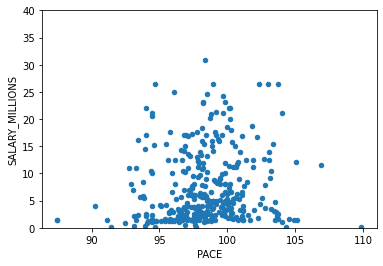

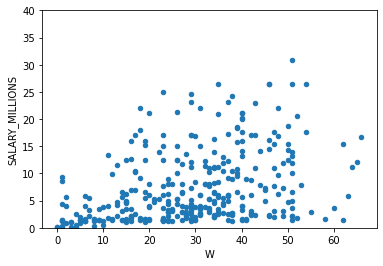

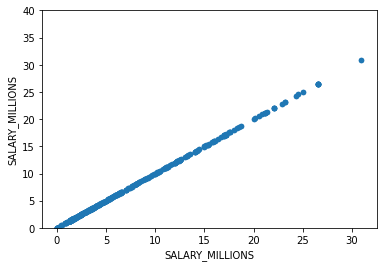

In [10]:
from pandas.api.types import is_numeric_dtype
for (colName, colData) in baller.iteritems():
    if is_numeric_dtype(colData):
        data = pd.concat([baller['SALARY_MILLIONS'], colData], axis=1)
        data.plot.scatter(x=colName, y='SALARY_MILLIONS', ylim=(0,40));

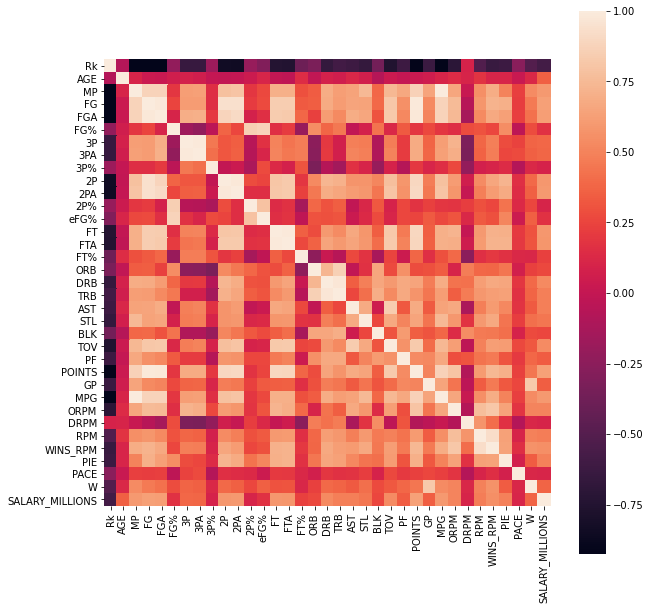

In [11]:
import seaborn
import matplotlib.pyplot
f, ax = matplotlib.pyplot.subplots(figsize=(10, 10))
seaborn.heatmap(baller.corr(), square=True);

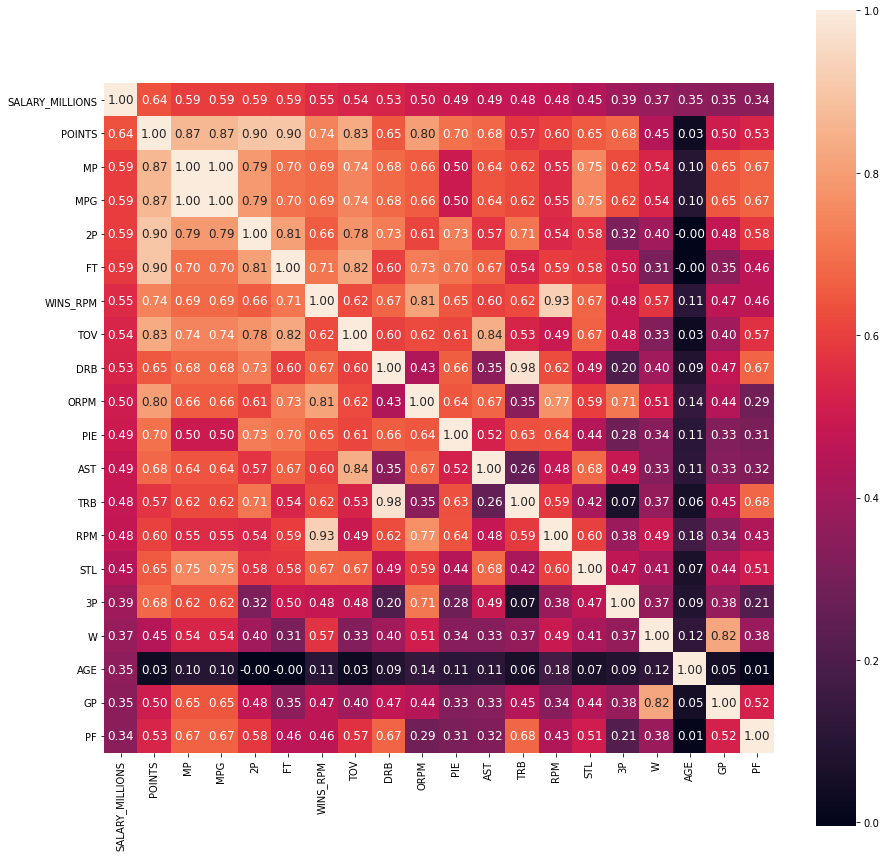

In [26]:
import numpy as np
cols = baller.corr().nlargest(20, 'SALARY_MILLIONS')['SALARY_MILLIONS'].index
cm = np.corrcoef(baller[cols].values.T)
f, ax = matplotlib.pyplot.subplots(figsize=(15, 15))
hm = seaborn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
matplotlib.pyplot.show()

In [19]:
#drop FG and FGA because there is high colinearity between FG and points as well as FGA and points
#also redundant with FG%
#inplace=True in order to remove from consideration
baller.drop(['FG','FGA'],axis='columns', inplace = True)



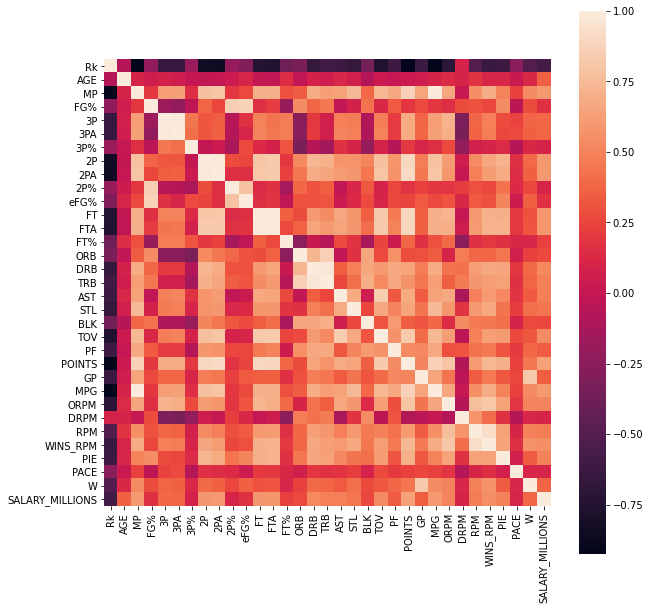

In [20]:
import seaborn
import matplotlib.pyplot
f, ax = matplotlib.pyplot.subplots(figsize=(10, 10))
seaborn.heatmap(baller.corr(), square=True);

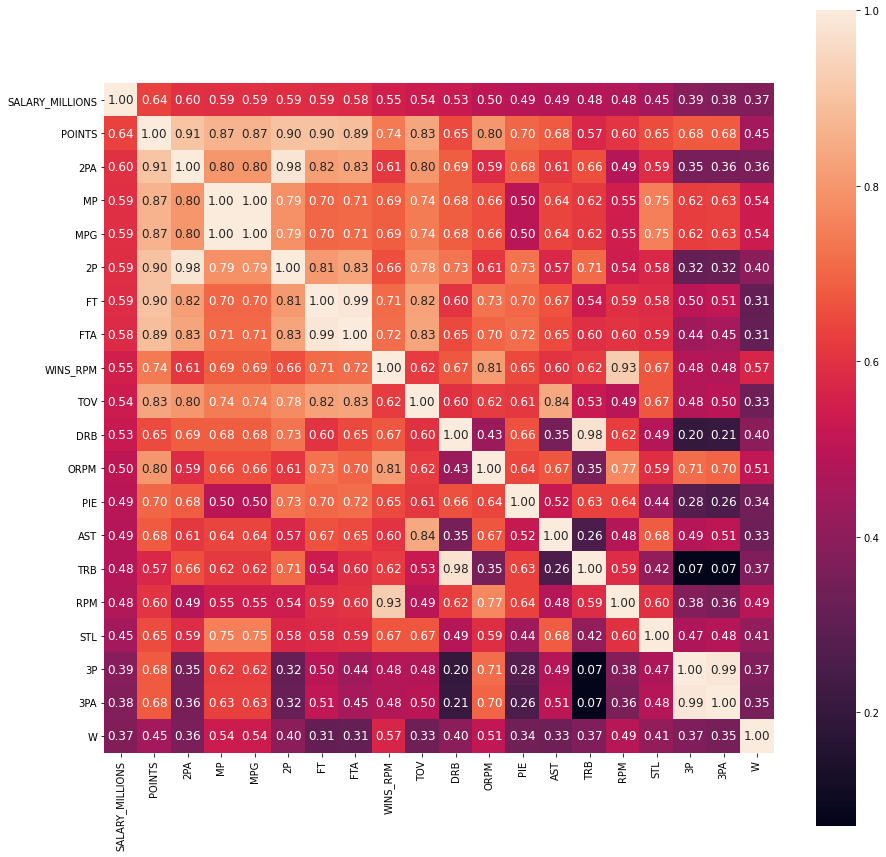

In [22]:
import numpy as np
cols = baller.corr().nlargest(20, 'SALARY_MILLIONS')['SALARY_MILLIONS'].index
cm = np.corrcoef(baller[cols].values.T)
f, ax = matplotlib.pyplot.subplots(figsize=(15, 15))
hm = seaborn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
matplotlib.pyplot.show()

In [23]:
#drop 2PA, 3PA, and FTA as they have high multicollinearity with 2P, 3P, and FT alike
baller.drop(['2PA','3PA','FTA'],axis='columns', inplace = True)

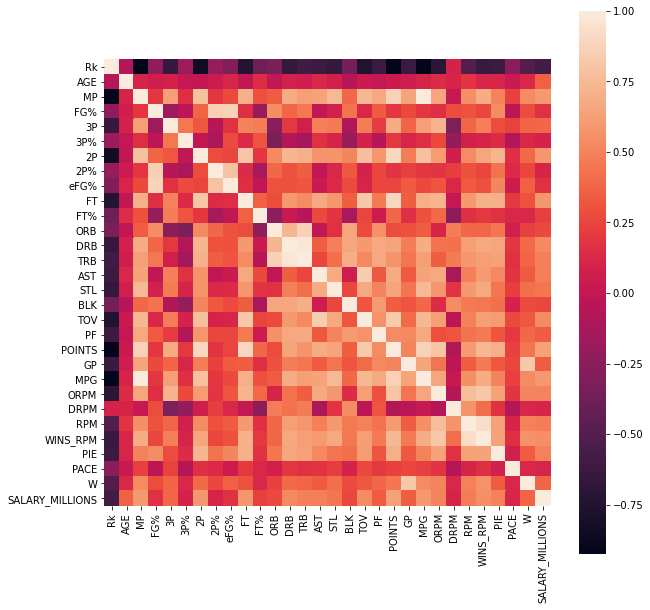

In [24]:
import seaborn
import matplotlib.pyplot
f, ax = matplotlib.pyplot.subplots(figsize=(10, 10))
seaborn.heatmap(baller.corr(), square=True);

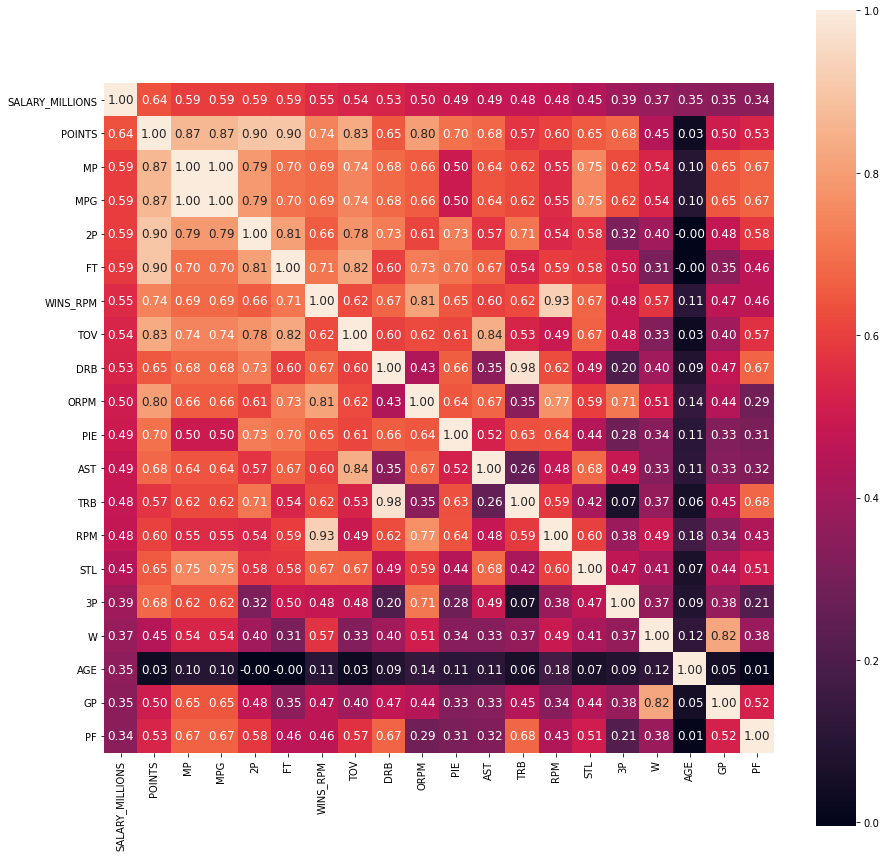

In [25]:
import numpy as np
cols = baller.corr().nlargest(20, 'SALARY_MILLIONS')['SALARY_MILLIONS'].index
cm = np.corrcoef(baller[cols].values.T)
f, ax = matplotlib.pyplot.subplots(figsize=(15, 15))
hm = seaborn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
matplotlib.pyplot.show()